In [ ]:
# Bước 1 : Nhập thư viện và đọc dữ liệu
# df.head() giúp  nhìn thấy cấu trúc file, cột nào là text, cột nào là số, ví dụ price là float, categorie, title là object.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

df = pd.read_csv('csv/cartier_catalog.csv')

df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [ ]:
# Bước 2: Kiểm tra cấu trúc dữ liệu

In [9]:
# Thông tin tổng quan về dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          692 non-null    object 
 1   categorie    692 non-null    object 
 2   title        692 non-null    object 
 3   price        692 non-null    float64
 4   tags         692 non-null    object 
 5   description  692 non-null    object 
 6   image        692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [ ]:
# Bước 3: Kiểm tra giá trị thiếu
# Nếu có cột null, sẽ xử lý sau (ví dụ: điền giá trị mặc định hoặc loại bỏ dòng).

In [11]:
# Kiểm tra cột nào có null và bao nhiêu
df.isnull().sum()

ref            0
categorie      0
title          0
price          0
tags           0
description    0
image          0
dtype: int64

In [ ]:
# Bước 4: Thống kê mô tả các cột số

# ; count: số giá trị không null

# ; mean: giá trung bình

# ; std: độ lệch chuẩn

# ; min, 25%, 50% (median), 75%, max

# ; Em sẽ thấy ngay phân bố giá sản phẩm: thấp nhất, cao nhất, trung bình, và giá trị outlier.

'Bạn sẽ thấy ngay phân bố giá sản phẩm: thấp nhất, cao nhất, trung bình, và giá trị outlier.'

In [13]:
# Thống kê các cột số (ở đây là price)
df.describe()

,price
count,692.000000
mean,27057.167630
std,54549.444975
min,500.000000
25%,2620.000000
50%,6800.000000
75%,22225.000000
max,370000.000000


In [ ]:
# Bước 5: Thống kê mô tả các cột object

# count: số giá trị không null

# unique: số lượng giá trị khác nhau

# top: giá trị xuất hiện nhiều nhất

# freq: tần suất giá trị xuất hiện nhiều nhất

# Ví dụ: categorie nhiều nhất là rings, tags nhiều nhất là yellow gold

In [15]:
# Thống kê cột text (category, tags, title)
df.describe(include='object')

,ref,categorie,title,tags,description,image
count,692,692,692,692,692,692
unique,692,4,165,103,676,680
top,B4084600,rings,Panthère de Cartier ring,"white gold, diamonds","Goldmaster de Cartier ring, 18K yellow gold.",/content/dam/rcq/car/58/61/69/586169.png
freq,1,259,36,121,3,2


In [3]:
# Loại bỏ khoảng trắng thừa trong tất cả các cột dạng chuỗi
str_cols = df.select_dtypes(include='object').columns

for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

# Chuẩn hóa cột tags: về chữ thường, tách tag thành danh sách
if 'tags' in df.columns:
    df['tags'] = (
        df['tags']
        .fillna('')
        .str.lower()
        .str.replace(', ', ',', regex=False)
        .str.split(',')
        .apply(lambda x: list(dict.fromkeys([t.strip() for t in x if t.strip()])))  # bỏ trùng lặp + loại rỗng
    )

# Loại bỏ bản ghi mà title bị thiếu
if 'title' in df.columns:
    df = df[df['title'].notnull()].reset_index(drop=True)

print("\n>>> Dữ liệu sau khi làm sạch:")
display(df.head())

print("\n>>> Kiểm tra lại thông tin:")
df.info()


>>> Dữ liệu sau khi làm sạch:


,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,[yellow gold],"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,[platinum],"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,[pink gold],"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,[white gold],"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,[yellow gold],"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png



>>> Kiểm tra lại thông tin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          692 non-null    object 
 1   categorie    692 non-null    object 
 2   title        692 non-null    object 
 3   price        692 non-null    float64
 4   tags         692 non-null    object 
 5   description  692 non-null    object 
 6   image        692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [ ]:
# Bước 6: Kiểm tra phân bố giá với biểu đồ
# Histogram + KDE giúp bạn thấy phân bố giá: nhiều sản phẩm ở khoảng giá nào, có outlier không.

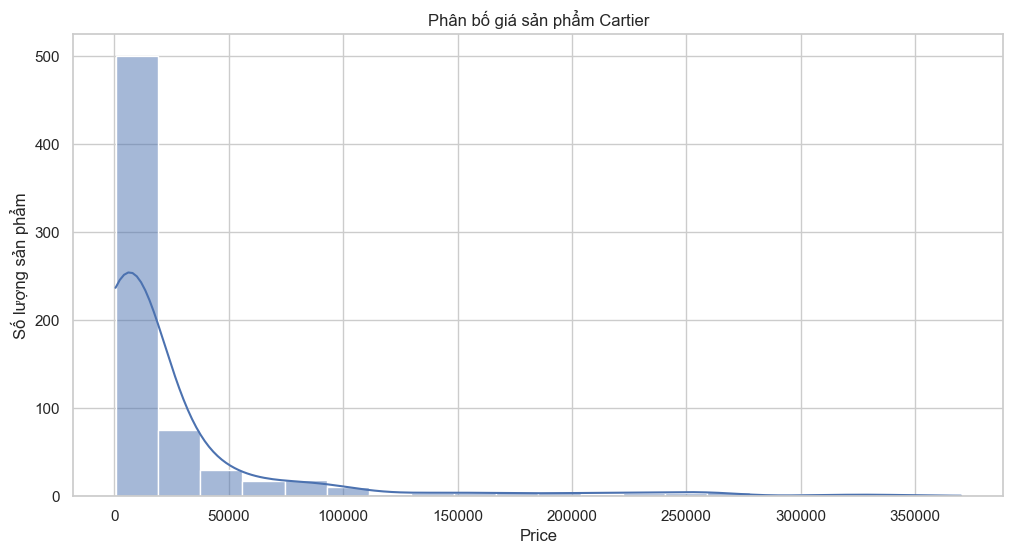

In [4]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Phân bố giá sản phẩm Cartier")
plt.xlabel("Price")
plt.ylabel("Số lượng sản phẩm")
plt.show()

In [ ]:
# Bước 7: Lưu kết quả EDA ra file
# Bạn có thể lưu thống kê mô tả ra CSV hoặc Excel để tiện báo cáo:

In [19]:
# Lưu thống kê mô tả cột số ra CSV
df.describe().to_csv('csv/eda_numeric_summary.csv')

# Lưu thống kê mô tả cột object ra CSV
df.describe(include='object').to_csv('csv/eda_object_summary.csv')

In [ ]:
# Bước 8a: Số lượng sản phẩm theo categorie

# value_counts() cho bạn biết loại sản phẩm nào phổ biến.

# Biểu đồ bar chart giúp trực quan hóa nhanh số lượng từng loại.

categorie
rings        259
bracelets    160
necklaces    155
earrings     118
Name: count, dtype: int64


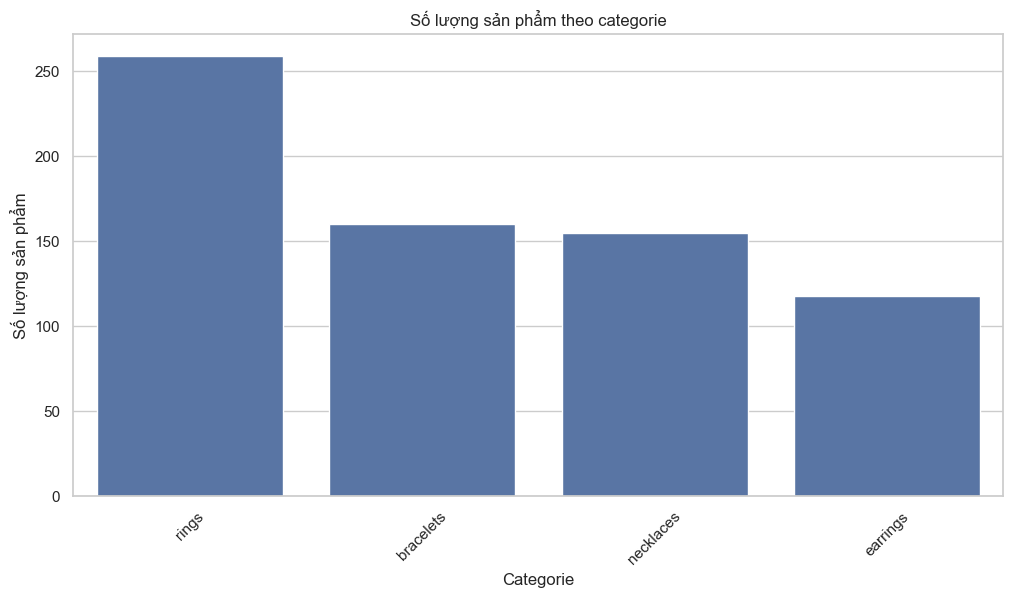

In [21]:
# Số lượng sản phẩm theo category
category_counts = df['categorie'].value_counts()
print(category_counts)

# Trực quan hóa bằng bar chart
sns.countplot(data=df, x='categorie', order=category_counts.index)
plt.xticks(rotation=45)
plt.title("Số lượng sản phẩm theo categorie")
plt.xlabel("Categorie")
plt.ylabel("Số lượng sản phẩm")
plt.show()


In [ ]:
# Bước 8b: Số lượng sản phẩm theo tags

# Thường tags dài và nhiều giá trị, nên chọn top 10 để biểu đồ trực quan hơn.

# Dùng y='tags' để bar chart nằm ngang, dễ đọc.


In [5]:
# Top 10 sản phẩm đắt nhất
top_10_expensive = df.nlargest(10, 'price')
print("Top 10 sản phẩm đắt nhất:")
display(top_10_expensive[['ref','title','categorie','price']])

# Top 10 sản phẩm rẻ nhất
top_10_cheap = df.nsmallest(10, 'price')
print("Top 10 sản phẩm rẻ nhất:")
display(top_10_cheap[['ref','title','categorie','price']])

Top 10 sản phẩm đắt nhất:


,ref,title,categorie,price
533,H7000130,Reflection de Cartier necklace,necklaces,370000.0
459,H7000156,Cactus de Cartier Necklace,necklaces,342000.0
390,H6004717,Juste un Clou bracelet,bracelets,331000.0
490,HP701146,Faune et Flore de Cartier necklace,necklaces,331000.0
389,HP601192,Juste un Clou bracelet,bracelets,312000.0
333,HP601197,Panthère de Cartier bracelet,bracelets,306000.0
369,H6019817,Reflection de Cartier bracelet,bracelets,263000.0
458,H7000320,Cactus de Cartier Necklace,necklaces,263000.0
488,H3000006,Les Oiseaux Libérés necklace,necklaces,263000.0
489,HP300100,Les Oiseaux Libérés necklace,necklaces,263000.0


Top 10 sản phẩm rẻ nhất:


,ref,title,categorie,price
579,B8301421,Love single earring,earrings,500.0
542,B7060700,Chain necklace,necklaces,570.0
550,B3153111,Cross pendant,necklaces,570.0
551,B3153112,Star pendant,necklaces,570.0
552,B3153113,Hand of Fatima pendant,necklaces,570.0
339,B6016700,Trinity bracelet,bracelets,580.0
340,B6046200,Trinity bracelet,bracelets,580.0
543,B7060800,Chain necklace,necklaces,610.0
110,B4002300,1895 wedding band,rings,690.0
111,B4088100,1895 wedding band,rings,690.0


tags
white gold, diamonds                            121
pink gold, diamonds                             100
yellow gold, diamonds                            60
yellow gold                                      45
pink gold                                        38
white gold                                       32
white gold, emeralds, onyx, diamonds             19
platinum                                         17
pink gold, diamond                               16
white gold, yellow gold, pink gold               16
white gold, yellow gold, pink gold, diamonds     16
platinum, diamonds                               13
white gold, diamond                              11
platinum, diamond                                 9
yellow gold, tsavorite garnets, onyx              9
Name: count, dtype: int64


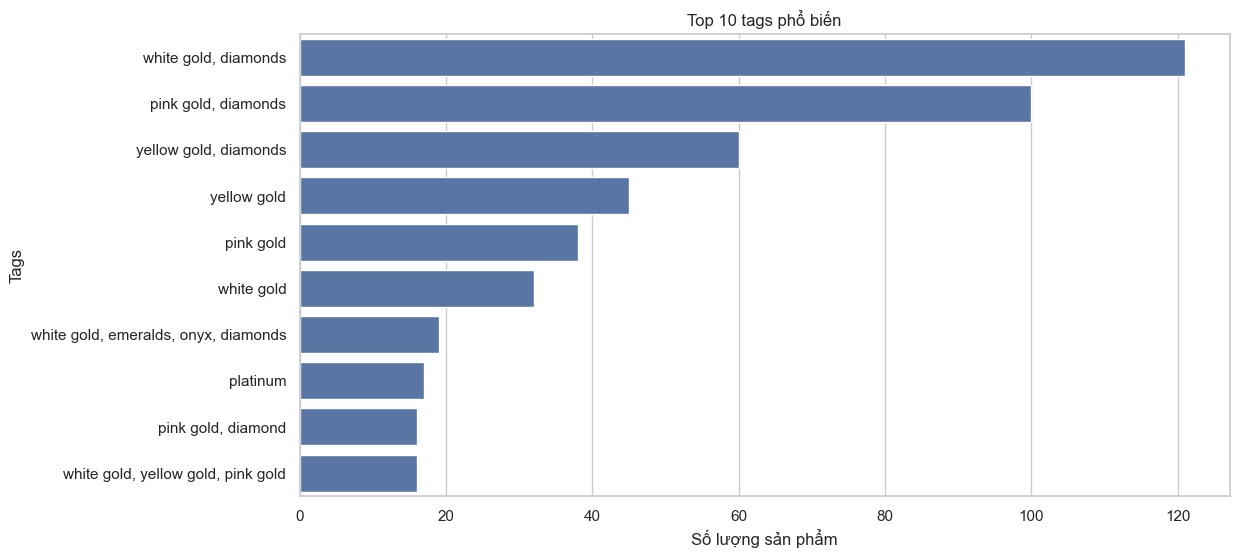

In [23]:
# Số lượng sản phẩm theo tags
tags_counts = df['tags'].value_counts()
print(tags_counts.head(15))  # in top 15 tags phổ biến nhất

# Bar chart cho top 10 tags
top_tags = tags_counts.head(10).index
sns.countplot(data=df[df['tags'].isin(top_tags)], y='tags', order=top_tags)
plt.title("Top 10 tags phổ biến")
plt.xlabel("Số lượng sản phẩm")
plt.ylabel("Tags")
plt.show()



In [ ]:
# Bước 8c: So sánh price giữa các categorie

# Boxplot giúp thấy phân bố giá: trung bình, min, max, outlier.

# groupby + mean() cho bạn số liệu trung bình để so sánh nhanh.

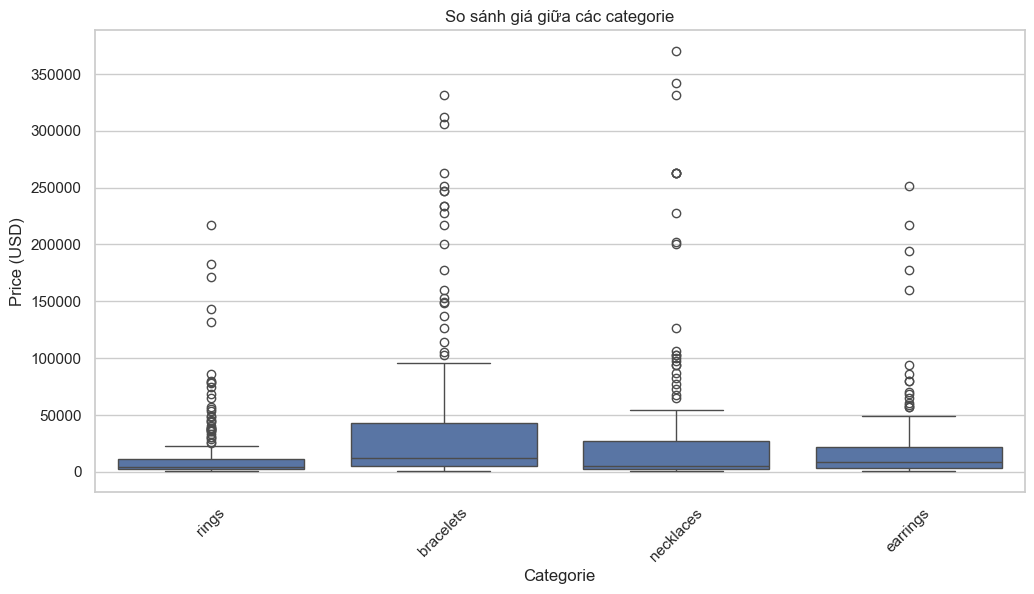

categorie
bracelets    44390.187500
necklaces    34155.612903
earrings     23653.389831
rings        13652.162162
Name: price, dtype: float64


In [25]:
# Boxplot: giá theo category
sns.boxplot(data=df, x='categorie', y='price')
plt.xticks(rotation=45)
plt.title("So sánh giá giữa các categorie")
plt.xlabel("Categorie")
plt.ylabel("Price (USD)")
plt.show()

# Thống kê trung bình giá theo category
price_mean_by_category = df.groupby('categorie')['price'].mean().sort_values(ascending=False)
print(price_mean_by_category)


In [ ]:
# Bước 8d: Phân bố giá chi tiết (optional)

# Giúp bạn thấy rõ: loại nào có giá phổ biến ở mức nào, loại nào có giá chênh lệch lớn.

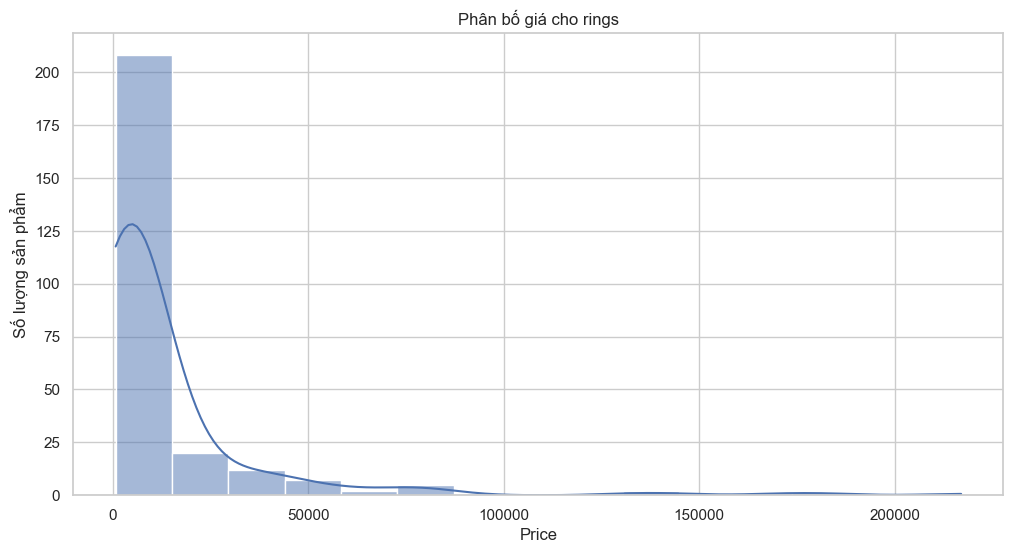

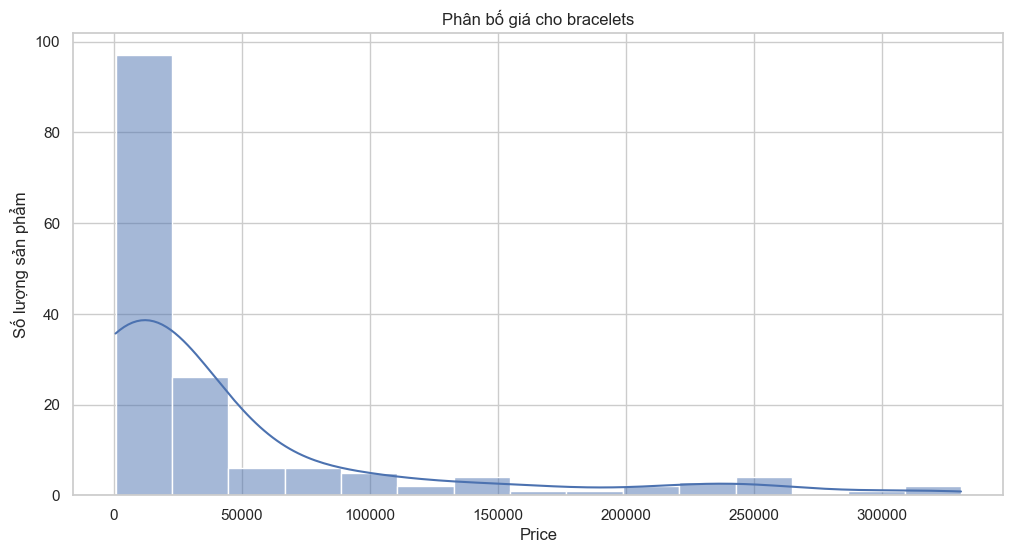

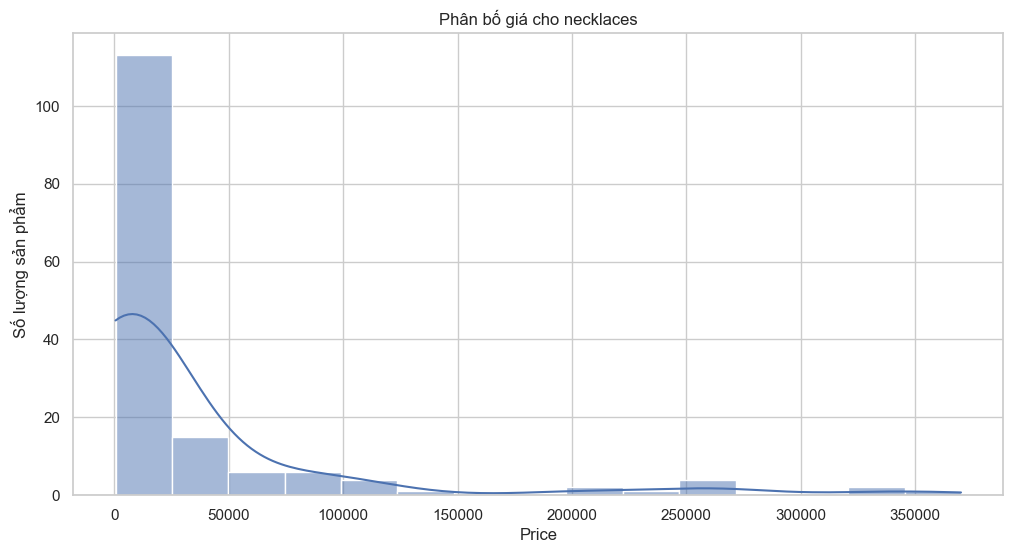

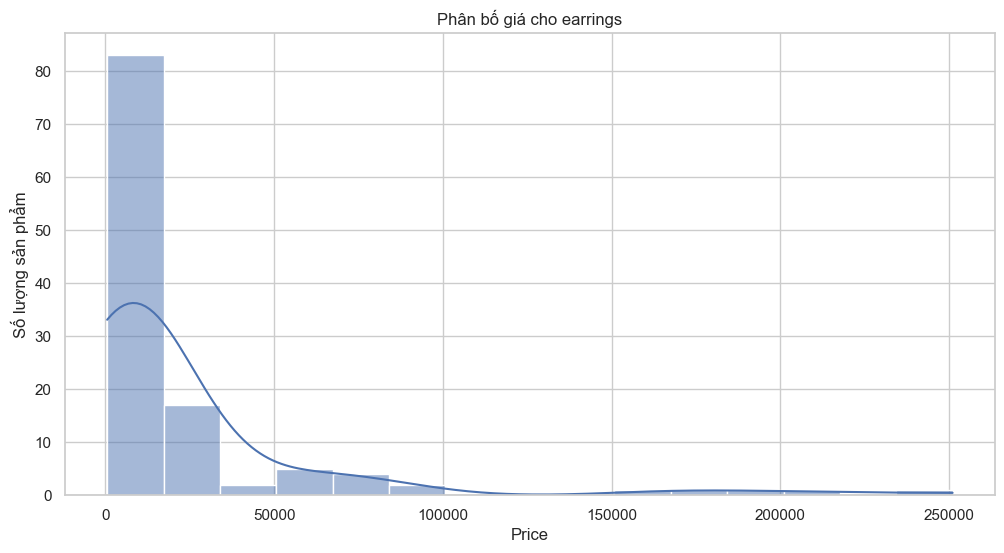

In [27]:
# Histogram riêng cho mỗi category
categories = df['categorie'].unique()
for cat in categories:
    subset = df[df['categorie'] == cat]
    sns.histplot(subset['price'], bins=15, kde=True)
    plt.title(f"Phân bố giá cho {cat}")
    plt.xlabel("Price")
    plt.ylabel("Số lượng sản phẩm")
    plt.show()


In [28]:
# Bước 3: Trực quan hóa nâng cao
# 3a. Pie chart – tỷ lệ sản phẩm theo categorie

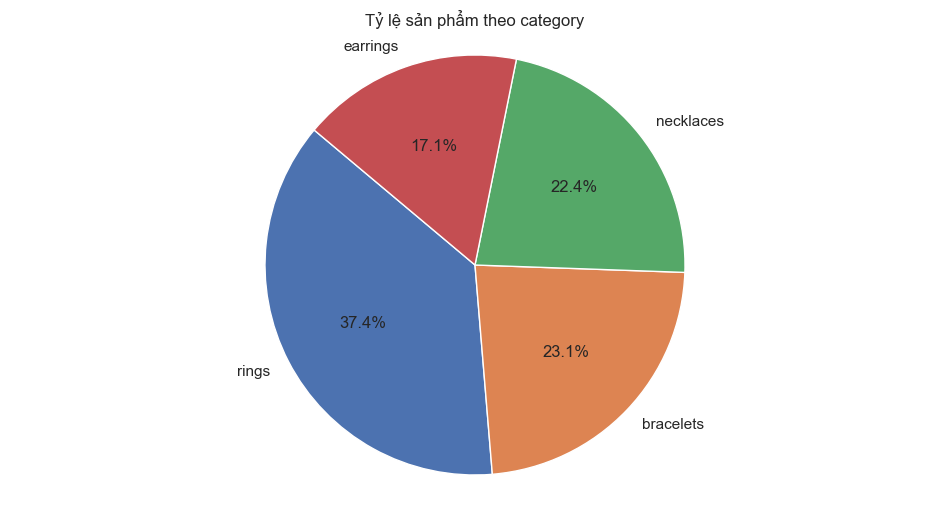

In [29]:
# Tỷ lệ sản phẩm theo category
category_counts = df['categorie'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Tỷ lệ sản phẩm theo category")
plt.axis('equal')  # hình tròn đều
plt.show()


In [30]:
# 3b. Pie chart – tỷ lệ sản phẩm theo tags (top 10)

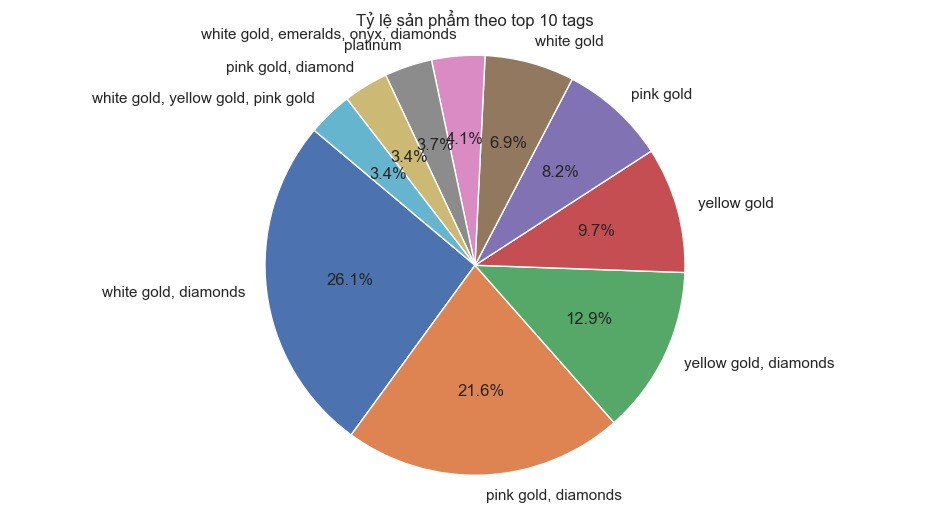

In [6]:
tags_counts = df['tags'].value_counts().head(10)
plt.pie(tags_counts, labels=tags_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Tỷ lệ sản phẩm theo top 10 tags")
plt.axis('equal')
plt.show()


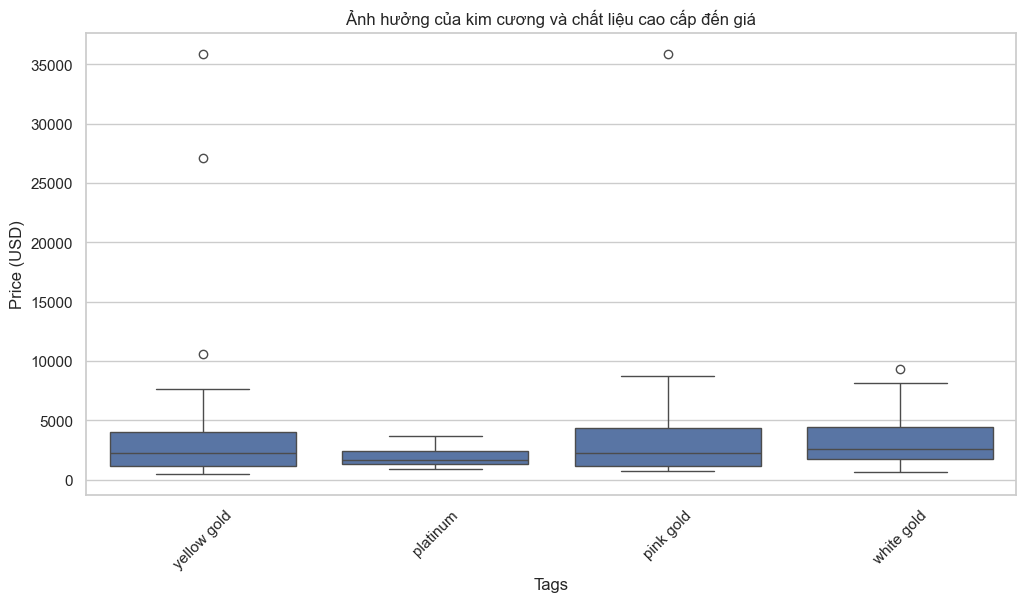

In [11]:
# Explode cột tags để mỗi tag thành một dòng riêng
df_exploded = df.explode('tags')

# Chọn các sản phẩm có tag liên quan đến chất liệu cao cấp
premium_tags = ['diamond', 'platinum', 'yellow gold', 'white gold', 'pink gold']
premium_subset = df_exploded[df_exploded['tags'].isin(premium_tags)]

# Boxplot giá theo tag
sns.boxplot(data=premium_subset, x='tags', y='price')
plt.xticks(rotation=45)
plt.title("Ảnh hưởng của kim cương và chất liệu cao cấp đến giá")
plt.xlabel("Tags")
plt.ylabel("Price (USD)")
plt.show()


In [ ]:
# 3c. Scatter plot – giá vs tags

# Mỗi điểm là một sản phẩm, màu theo categorie

# Giúp thấy giá chênh lệch giữa các tag và loại sản phẩm

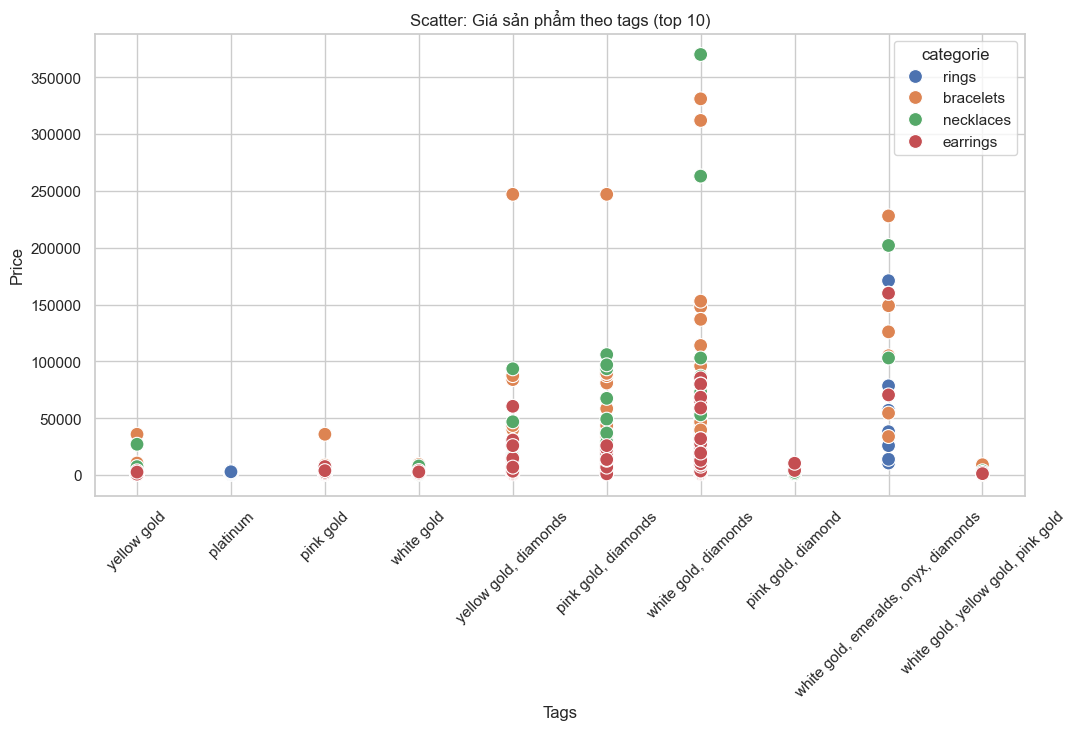

In [33]:
top_tags = df['tags'].value_counts().head(10).index
subset = df[df['tags'].isin(top_tags)]

sns.scatterplot(data=subset, x='tags', y='price', hue='categorie', s=100)
plt.xticks(rotation=45)
plt.title("Scatter: Giá sản phẩm theo tags (top 10)")
plt.ylabel("Price")
plt.xlabel("Tags")
plt.show()


In [34]:
# Bước 4: Phân tích nâng cao

In [35]:
# 4a. Top 10 sản phẩm đắt nhất
top10 = df.sort_values(by='price', ascending=False).head(10)
top10[['ref', 'title', 'categorie', 'tags', 'price']]

,ref,title,categorie,tags,price
533,H7000130,Reflection de Cartier necklace,necklaces,"white gold, diamonds",370000.0
459,H7000156,Cactus de Cartier Necklace,necklaces,"yellow gold, emeralds, diamonds",342000.0
390,H6004717,Juste un Clou bracelet,bracelets,"white gold, diamonds",331000.0
490,HP701146,Faune et Flore de Cartier necklace,necklaces,"platinum, emeralds, diamonds",331000.0
389,HP601192,Juste un Clou bracelet,bracelets,"white gold, diamonds",312000.0
333,HP601197,Panthère de Cartier bracelet,bracelets,"platinum, emeralds, onyx, diamonds",306000.0
570,H7000308,Pluie de Cartier necklace,necklaces,"white gold, diamonds",263000.0
458,H7000320,Cactus de Cartier Necklace,necklaces,"yellow gold, chrysoprase, lapis lazuli, diamonds",263000.0
489,HP300100,Les Oiseaux Libérés necklace,necklaces,"white gold, emeralds, sapphire, mother-of-pear...",263000.0
369,H6019817,Reflection de Cartier bracelet,bracelets,"white gold, diamonds",263000.0


In [36]:
# 4b. Top 10 sản phẩm rẻ nhất
bottom10 = df.sort_values(by='price', ascending=True).head(10)
bottom10[['ref', 'title', 'categorie', 'tags', 'price']]

,ref,title,categorie,tags,price
579,B8301421,Love single earring,earrings,yellow gold,500.0
550,B3153111,Cross pendant,necklaces,yellow gold,570.0
552,B3153113,Hand of Fatima pendant,necklaces,yellow gold,570.0
551,B3153112,Star pendant,necklaces,yellow gold,570.0
542,B7060700,Chain necklace,necklaces,yellow gold,570.0
339,B6016700,Trinity bracelet,bracelets,"white gold, yellow gold, pink gold",580.0
340,B6046200,Trinity bracelet,bracelets,"white gold, ceramic",580.0
543,B7060800,Chain necklace,necklaces,white gold,610.0
111,B4088100,1895 wedding band,rings,pink gold,690.0
110,B4002300,1895 wedding band,rings,yellow gold,690.0


In [ ]:
# 4c. Giá trung bình theo tags (top 10)

# Nhìn nhanh tags nào đắt nhất/ rẻ nhất

# Hỗ trợ ra insight marketing / bán hàng
avg_price_tags = subset.groupby('tags')['price'].mean().sort_values(ascending=False)
print(avg_price_tags)

tags
white gold, emeralds, onyx, diamonds    96031.578947
white gold, diamonds                    37489.669421
yellow gold, diamonds                   19640.166667
pink gold, diamonds                     19265.900000
yellow gold                              4191.333333
pink gold                                3832.894737
white gold                               3550.625000
pink gold, diamond                       2839.375000
white gold, yellow gold, pink gold       2148.750000
platinum                                 1886.470588
Name: price, dtype: float64


In [38]:
# 4d. Lưu kết quả phân tích nâng cao ra CSV (tùy chọn)
top10.to_csv('csv/top10_expensive_products.csv', index=False)
bottom10.to_csv('csv/top10_cheap_products.csv', index=False)
avg_price_tags.to_csv('csv/avg_price_top_tags.csv')